Расстояния между точками:
Точки 0-1: Евклидово = 14.97, Манхэттенское = 24, Чебышёвское = 12
Точки 0-2: Евклидово = 15.52, Манхэттенское = 25, Чебышёвское = 12
Точки 0-3: Евклидово = 17.23, Манхэттенское = 27, Чебышёвское = 12
Точки 1-2: Евклидово = 9.43, Манхэттенское = 15, Чебышёвское = 8
Точки 1-3: Евклидово = 8.06, Манхэттенское = 11, Чебышёвское = 7
Точки 2-3: Евклидово = 17.26, Манхэттенское = 26, Чебышёвское = 15


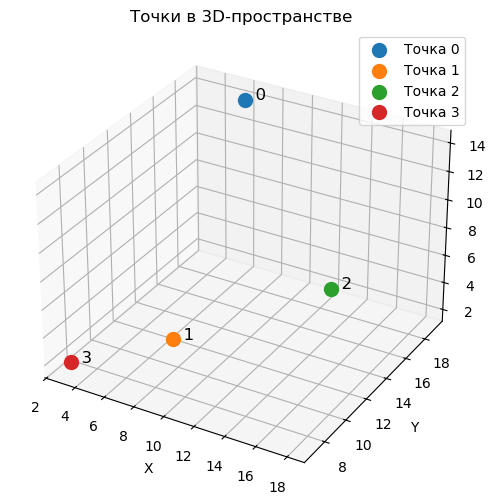

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

np.random.seed(42)  
points = np.random.randint(0, 20, (4, 3))


def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

def manhattan_distance(p1, p2):
    return np.sum(np.abs(p1 - p2))

def chebyshev_distance(p1, p2):
    return np.max(np.abs(p1 - p2))


distances = []
for (i, p1), (j, p2) in combinations(enumerate(points), 2):
    d_euc = euclidean_distance(p1, p2)
    d_man = manhattan_distance(p1, p2)
    d_cheb = chebyshev_distance(p1, p2)
    distances.append((i, j, d_euc, d_man, d_cheb))

# Вывод результатов
print("Расстояния между точками:")
for i, j, d_euc, d_man, d_cheb in distances:
    print(f"Точки {i}-{j}: Евклидово = {d_euc:.2f}, Манхэттенское = {d_man}, Чебышёвское = {d_cheb}")


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


for i, (x, y, z) in enumerate(points):
    ax.scatter(x, y, z, s=100, label=f'Точка {i}')
    ax.text(x, y, z, f'  {i}', fontsize=12)

# Подписываем оси
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Точки в 3D-пространстве')
ax.legend()

plt.show()




In [2]:
Z = np.zeros((5,5))
Z += np.arange(5)
print(Z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


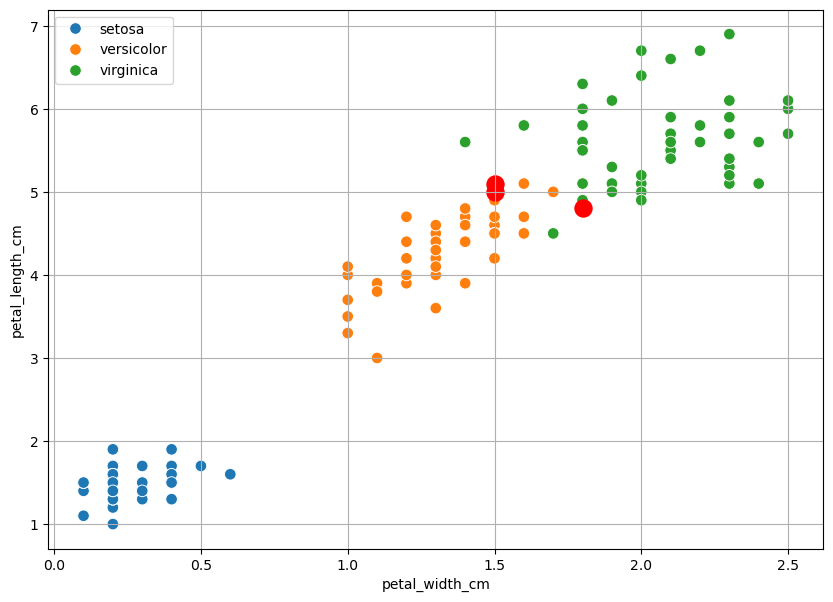

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/akmand/datasets/master/iris.csv')

x_train, x_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.iloc[:,-1],test_size=0.15)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

plt.figure(figsize=(10,7))
sns.scatterplot(x="petal_width_cm", y = "petal_length_cm",data = iris, hue="species",s=70)
plt.legend(loc=2)
plt.grid()
for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(x_test.iloc[i,3],x_test.iloc[i,2],color="red",s=150)


In [ ]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test,y_pred): .3}')


accuracy:  0.87


In [ ]:
import pandas as pd


human_features = [
    "Фамилия",
    "Имя", 
    "Отчество", 
    "Возраст", 
    "Пол", 
    "Рост", 
    "Вес",  
    "Стиль одежды"
]
data = [
    ["Петров", "Иван",  "Александрович", 30, "М", 180, 80, "Классический"],
    ["Иванова", "Мария",  "Сергеевна", 25, "Ж", 165, 55, "Спортивный"],
    ["Смирнов", "Алексей",  "Игоревич", 35, "М", 175, 75, "Повседневный"],
]

# Преобразуем в DataFrame
df = pd.DataFrame(data, columns=human_features)
print(df)


       Имя  Фамилия       Отчество  Возраст Пол  Рост  Вес  Стиль одежды
0     Иван   Петров  Александрович       30   М   180   80  Классический
1    Мария  Иванова      Сергеевна       25   Ж   165   55    Спортивный
2  Алексей  Смирнов       Игоревич       35   М   175   75  Повседневный
